# Introducción

Resumen
En este proyecto se utilizó el conocido dataset Iris, un referente en aprendizaje automático y ciencia de datos, para desarrollar un modelo de clasificación robusto capaz de diferenciar entre tres especies de flores: Setosa, Versicolor y Virginica. El proyecto siguió un pipeline estructurado que incluyó la exploración de datos, entrenamiento de modelos, optimización de hiperparámetros y evaluación.

Tras un análisis exploratorio de datos (EDA) para comprender las distribuciones de las características y la separabilidad de las clases, se seleccionó un modelo de Árbol de Decisión como clasificador principal, dada su interpretabilidad y adecuación al problema. Mediante la optimización de hiperparámetros con GridSearchCV, se identificaron los parámetros óptimos (max_depth=3, min_samples_leaf=1, min_samples_split=2), lo que permitió alcanzar un rendimiento sobresaliente con un accuracy promedio del 97.33% en validación cruzada y excelentes métricas por clase. El modelo optimizado muestra ser eficaz, interpretable y generalizable para la clasificación del dataset Iris.

# Importación de Librerías y Carga del Dataset

In [ ]:
# Instalar cualquier librería necesaria (aunque la mayoría ya está incluida en Colab)
!pip install pandas matplotlib seaborn scikit-learn


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset
iris = load_iris()

# Convertir a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Mostrar los primeros registros
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Análisis Exploratorio de Datos (EDA)

In [ ]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas
df.describe()

# Distribución de las clases
df['target_name'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,count
target_name,
setosa,50
versicolor,50
virginica,50


# Preparación de Datos

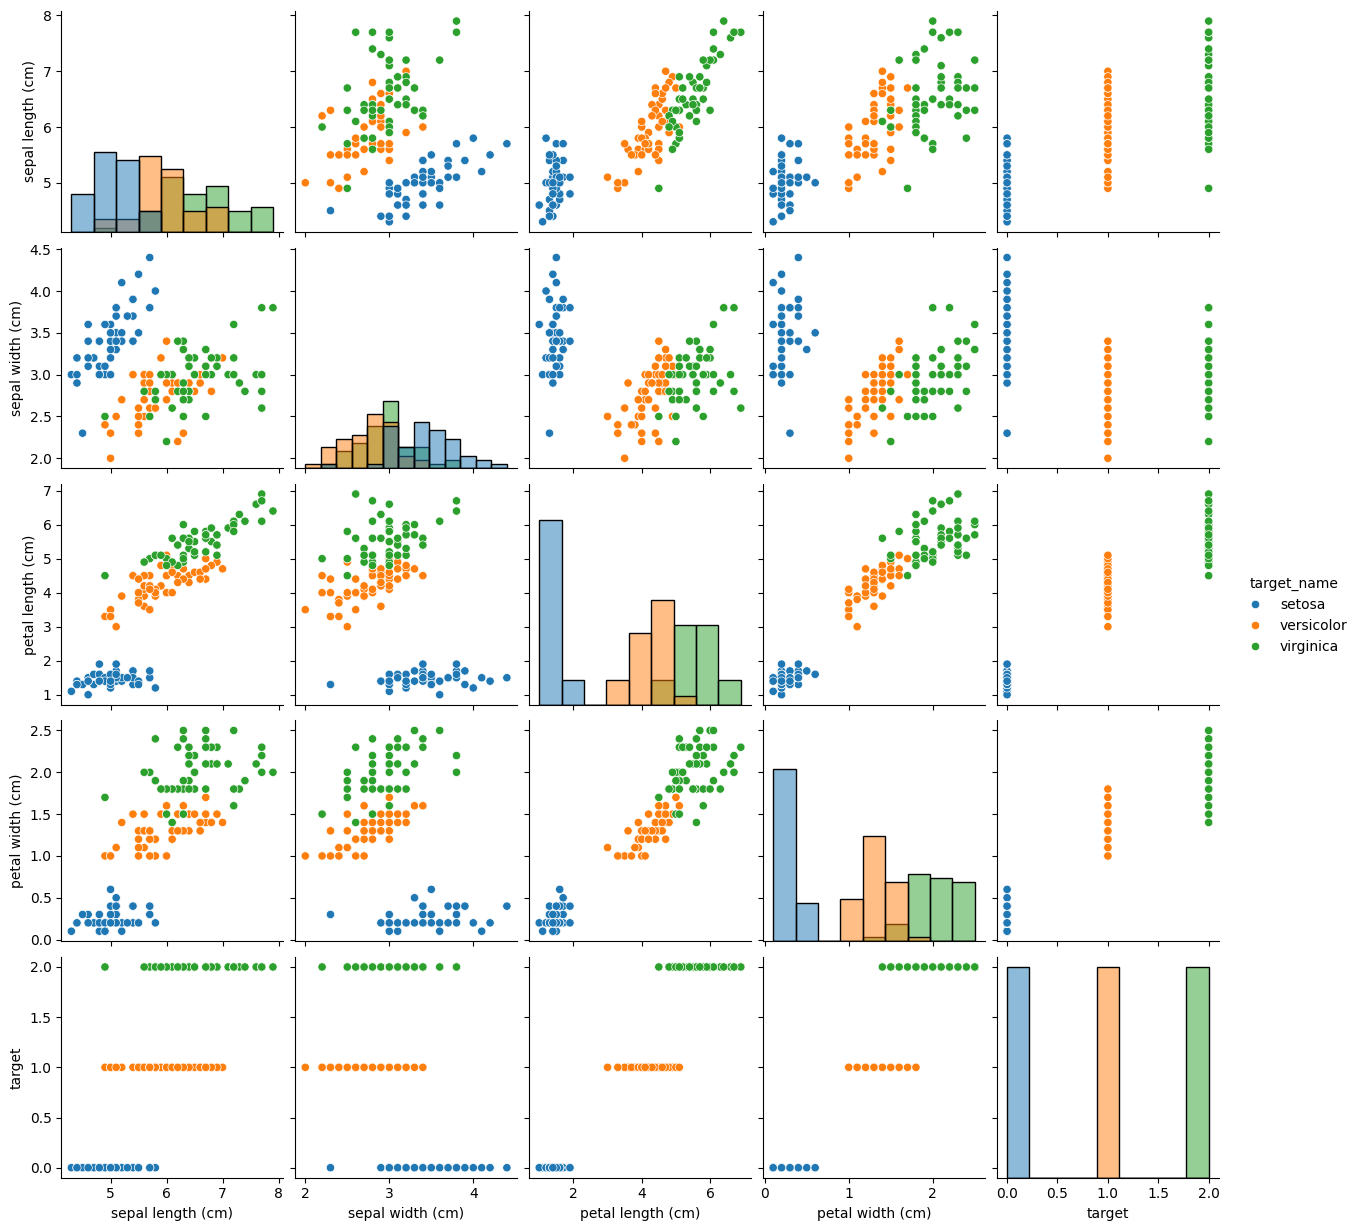

ValueError: could not convert string to float: 'setosa'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot para ver relaciones entre características
sns.pairplot(df, hue='target_name', diag_kind='hist')
plt.show()

# Mapa de calor para correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


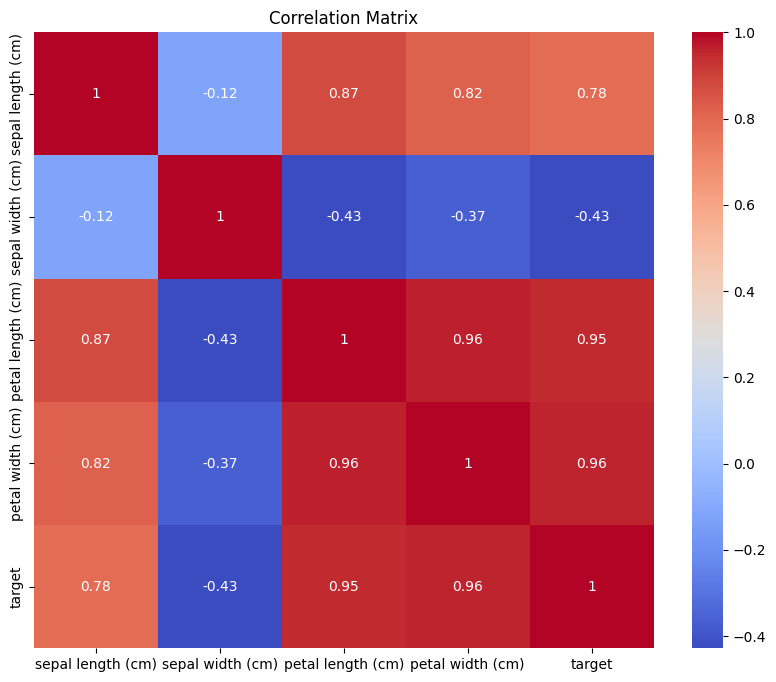

In [ ]:
# Excluir columnas no numéricas
correlation_matrix = df.drop(['target_name'], axis=1).corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


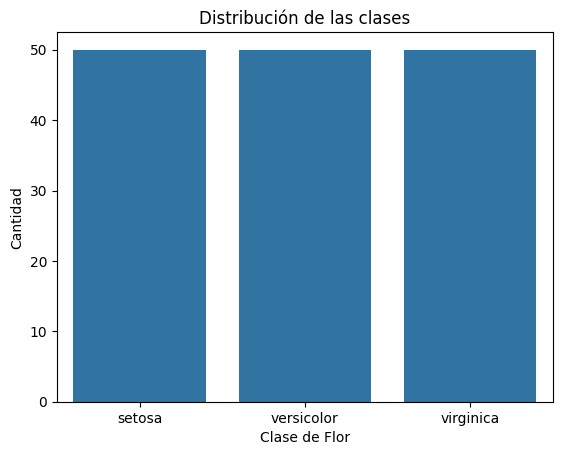

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar las instancias de cada clase
sns.countplot(x='target_name', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Clase de Flor')
plt.ylabel('Cantidad')
plt.show()


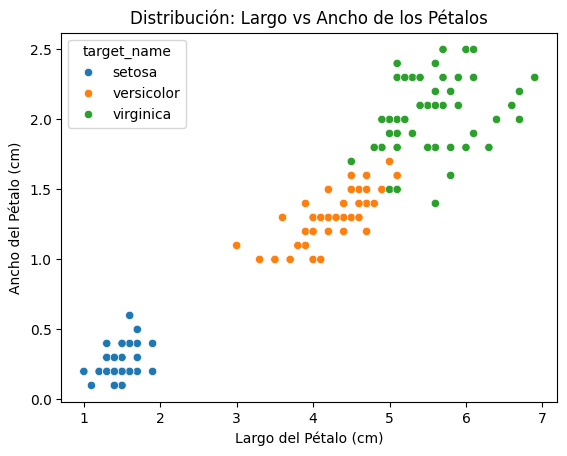

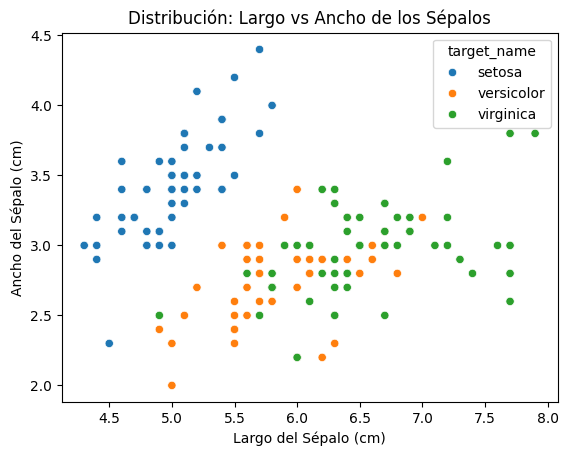

In [ ]:
# Relación entre largo y ancho de los pétalos
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_name', data=df)
plt.title('Distribución: Largo vs Ancho de los Pétalos')
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.show()

# Relación entre largo y ancho de los sépalos
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_name', data=df)
plt.title('Distribución: Largo vs Ancho de los Sépalos')
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.show()


# Entrenamiento Inicial del Modelo

In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Dividir los datos en características (X) y etiquetas (y)
X = df.drop(['target', 'target_name'], axis=1)  # Características
y = df['target']  # Etiquetas

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Usamos 3 vecinos como ejemplo

# Entrenar el modelo
knn.fit(X_train, y_train)

# 3. Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Optimización de Hiperparámetros

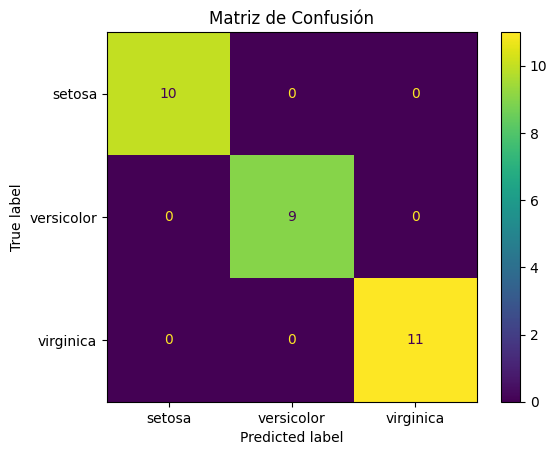

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=iris.target_names)
plt.title("Matriz de Confusión")
plt.show()


# Evaluación del Modelo Optimizado

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predicción y evaluación
y_pred_tree = tree.predict(X_test)
print("Árbol de Decisión - Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Árbol de Decisión - Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Visualización del Árbol de Decisión

Puntajes de Validación Cruzada: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Promedio de Validación Cruzada: 0.9533333333333334


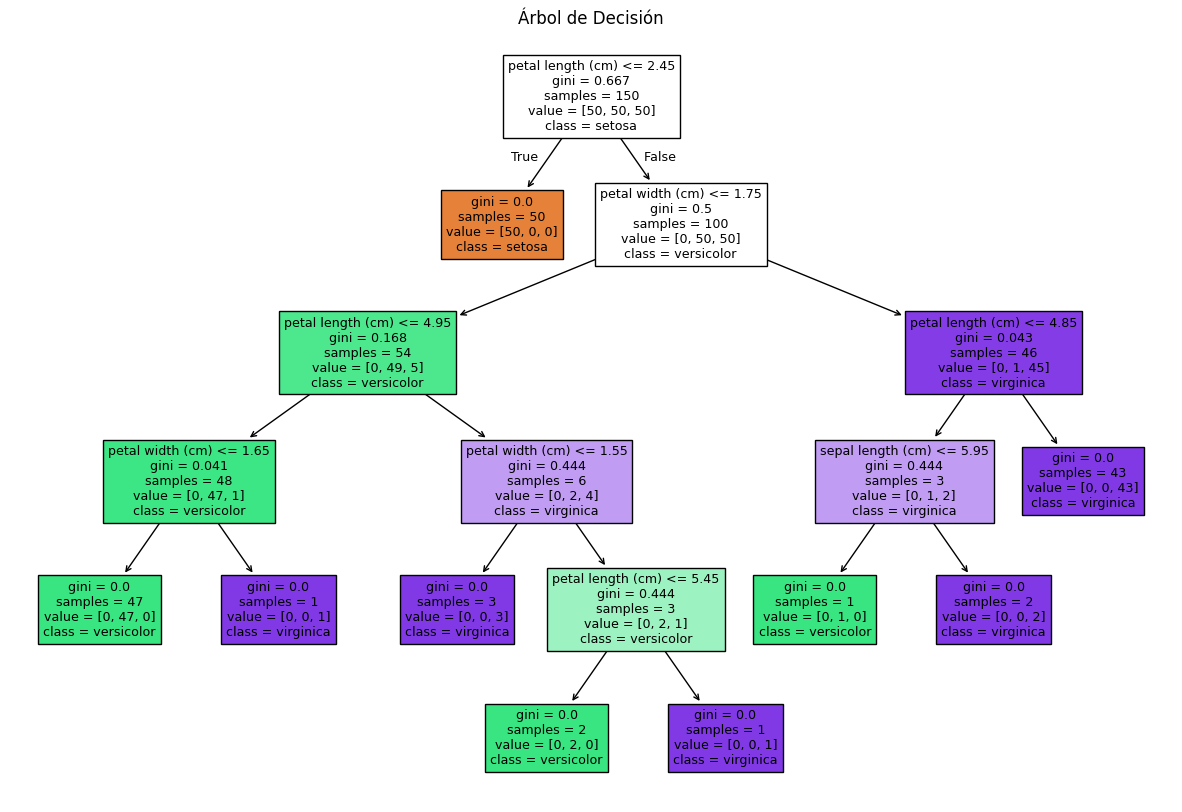

In [5]:
# Paso 1: Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Cargar y preparar el dataset
# Cargar el dataset de Iris
iris = load_iris()

# Crear un DataFrame opcional para inspección
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Definir X (características) e y (etiquetas)
X = iris.data  # O df.drop(['target', 'target_name'], axis=1)
y = iris.target  # O df['target']

# Paso 3: Crear el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)

# Paso 4: Realizar la validación cruzada
cv_scores = cross_val_score(tree, X, y, cv=5)  # Dividimos en 5 subconjuntos
print("Puntajes de Validación Cruzada:", cv_scores)
print("Promedio de Validación Cruzada:", cv_scores.mean())

# Paso 5: Entrenar y visualizar el Árbol de Decisión
tree.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión")
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X, y)

print("Mejores Parámetros:", grid_search.best_params_)
best_tree = grid_search.best_estimator_


Mejores Parámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Predicción con el mejor modelo
y_pred_best = best_tree.predict(X)
print("Accuracy del Mejor Modelo:", accuracy_score(y, y_pred_best))
print("\nClassification Report:\n", classification_report(y, y_pred_best))


Accuracy del Mejor Modelo: 0.9733333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



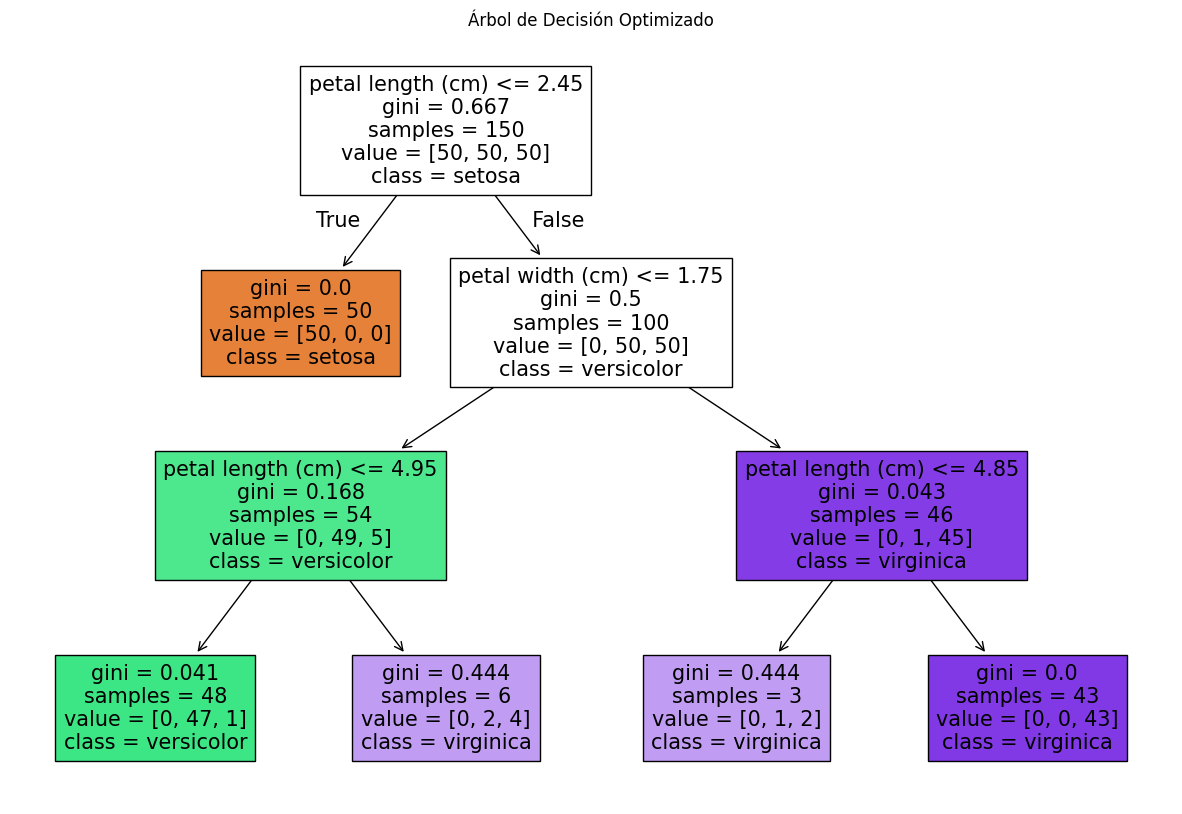

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el Árbol de Decisión optimizado
plt.figure(figsize=(15, 10))
plot_tree(best_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión Optimizado")
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score

cv_scores_best = cross_val_score(best_tree, X, y, cv=5)
print("Puntajes de Validación Cruzada (Optimizado):", cv_scores_best)
print("Promedio de Validación Cruzada (Optimizado):", cv_scores_best.mean())


Puntajes de Validación Cruzada (Optimizado): [0.96666667 0.96666667 0.93333333 1.         1.        ]
Promedio de Validación Cruzada (Optimizado): 0.9733333333333334


# Conclusiones

Conclusión
Tu modelo optimizado tiene un rendimiento sobresaliente y es altamente confiable para clasificar correctamente las flores del dataset Iris.
La mejora de los hiperparámetros ha resultado en un modelo balanceado y eficaz.